# Duat demo

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from duat import config, plot, run

If a warning on not found executables was raised, add a cell setting the path to the folder with the executables:
run.set_osiris_path(path.join("path", "to", "osiris", "folder"))

## Creating a simulation

In [3]:
# Create a config file with the defaults
sim = config.ConfigFile(1)  # Argument -> dimension
# Check the generated code
print(sim)


node_conf
{
  node_number(1:1) = 1,
  if_periodic(1:1) = .true.,
}

grid
{
  coordinates = "cartesian",
  nx_p(1:1) = 1024,
}

time_step
{
  dt = 0.07,
  ndump = 10,
}

space
{
  xmin(1:1) = 0,
  xmax(1:1) = 102.4,
  if_move(1:1) = .false.,
}

time
{
  tmin = 0,
  tmax = 7,
}

emf_bound
{
  type(1:2, 1) = 0, 0,
  
}

particles
{
  num_species = 2,
  num_cathode = 0,
  num_neutral = 0,
  num_neutral_mov_ions = 0,
}

!---Species configuration
!---Configuration for species 1
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 2,
  vth(1:3) = 0, 0, 0,
  vfl(1:3) = 0, 0, 0,
}

profile
{
  fx(1:6, 1) = 1, 1, 1, 1, 1, 1,
  
  x(1:6, 1) = 0, 0.9999, 1, 2, 2.001, 10000,
  
}

spe_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_species
{
}


!---Configuration for species 2
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 2,
  vth(1:3) = 0, 0, 0,
  vfl(1:3) = 0, 0, 0,
}

profile
{
  fx(1:6, 1) = 1, 1, 1, 1, 1, 1,
  
  x(1:6, 1) = 0, 0.9999, 1, 2, 2.001, 10000,
  
}

spe_bound
{

In [4]:
# Let's change some parameters:
# Parameters can be edited using the python item access notation
sim["time"]["tmax"] = 30.0
# Beware the python indexes starting at zero. E.g., "1" is the second particle species
sim["species_list"][0]["species"]["vfl"] = [0.0, 0.0, 0.6]
sim["species_list"][0]["species"]["num_par_x"] = [200]
sim["species_list"][1]["species"]["vfl"] = [0.0, 0.0, -0.6]
sim["species_list"][1]["species"]["num_par_x"] = [200]

# Order of output is handled by duat. We can now change parameters that will appear before
sim["species_list"][0]["diag_species"].set_pars(ndump_fac=1, reports="ene")

# We can benefit from python preprocessing
ene_bins = np.arange(0, 0.5, 0.02)
sim["species_list"][1]["diag_species"].set_pars(ndump_fac=1, ndump_fac_pha=1, pha_ene_bin="x1_|charge|",
                                                ene_bins=ene_bins, n_ene_bins=len(ene_bins))


In [5]:
# Even if a section was not created, accesing it with the index notation will create it
sim["diag_emf"]["reports"] = ["e1", "e2", "e3"]
sim["diag_emf"]["ndump_fac"] = 5


In [6]:
# This also works with lists
sim["zpulse_list"][0].set_pars(a0=1.0, omega0=1.0, phase=0.0, pol_type=1, pol=0, propagation="forward",
                               lon_type="gaussian", lon_x0=40, lon_range=20, lon_duration=50, per_type="plane")


In [7]:
# Check the generated code again
print(sim)

node_conf
{
  node_number(1:1) = 1,
  if_periodic(1:1) = .true.,
}

grid
{
  coordinates = "cartesian",
  nx_p(1:1) = 1024,
}

time_step
{
  dt = 0.07,
  ndump = 10,
}

space
{
  xmin(1:1) = 0,
  xmax(1:1) = 102.4,
  if_move(1:1) = .false.,
}

time
{
  tmin = 0,
  tmax = 30,
}

emf_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_emf
{
  reports(1:3) = "e1", "e2", "e3",
  ndump_fac = 5,
}

particles
{
  num_species = 2,
  num_cathode = 0,
  num_neutral = 0,
  num_neutral_mov_ions = 0,
}

!---Species configuration
!---Configuration for species 1
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 200,
  vth(1:3) = 0, 0, 0,
  vfl(1:3) = 0, 0, 0.6,
}

profile
{
  fx(1:6, 1) = 1, 1, 1, 1, 1, 1,
  
  x(1:6, 1) = 0, 0.9999, 1, 2, 2.001, 10000,
  
}

spe_bound
{
  type(1:2, 1) = 0, 0,
  
}

diag_species
{
  ndump_fac = 1,
  reports = "ene",
}


!---Configuration for species 2
species
{
  num_par_max = 2048,
  rqm = -1,
  num_par_x(1:1) = 200,
  vth(1:3) = 0, 0, 0,
  vfl(1:3) = 0, 0, -0.6,

## Running a simulation

In [8]:
# A directory for the runs
run_dir = os.path.join(os.path.expanduser("~"), "test-run")

In [9]:
# Sequentially run simulations varying a parameter. This also checks for errors, but note they are not always detected
myrun = run.run_config(sim, run_dir, prefix="", blocking=False, clean_dir=True)

In [11]:
# The created run instance offers some information of the run in progress.
myrun

Run<test-run [RUNNING (93/429)]>

In [12]:
# Other methods are available in the Run object. See the documentation for more information.
print("Size in disk of the run: %.2f MiB" % (myrun.get_size()/1024/1024))

Size in disk of the run: 4.56 MiB


## Plotting the results

In [13]:
# Diagnostic objects can be used even if the run is in progress
diagnostics = myrun.get_diagnostic_list()
for d in diagnostics:
    print(d)

Diagnostic<species 2 x_1 (|charge|) ([64], 26, 43)>
Diagnostic<E_2 ([1024], 1, 9)>
Diagnostic<E_1 ([1024], 1, 9)>
Diagnostic<E_3 ([1024], 1, 9)>
Diagnostic<Kinetic Energy ([1024], 1, 43)>


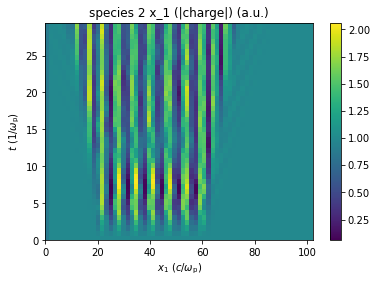

In [14]:
# Methods like time_1d_colormap allow to represent a map
fig, ax = diagnostics[0].time_1d_colormap(dataset_selector=np.sum)
# The returned Figure and Axes instances allow for customization and export.
# Note the method itself takes a parameter for automatic exportation

In [15]:
# The time_1d_animation method allows to visualize a function in time
fig, ax, anim = diagnostics[2].time_1d_animation()
# This can be exported using the anim object or given a parameter to the function.

In [16]:
# In Jupyter you can plot this with:
from IPython.display import HTML
HTML(anim.to_html5_video())
# The video can be downloaded from the output.

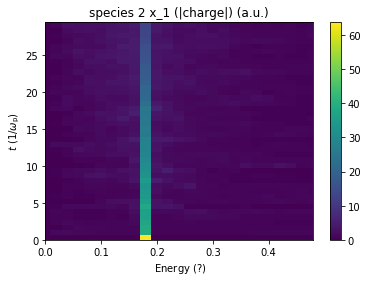

In [17]:
# Do the same as a color map
fig, ax = diagnostics[0].time_1d_colormap(axes_selector=(np.sum,))

In [18]:
# For manual manipulation use the get_generator method
gen = diagnostics[1].get_generator()
# This returns a generator that provides data when iterated
for snapshot in gen:
    print(snapshot)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ..., -0.  0.  0.]
[  1.10721851e-14   5.51171657e-14   2.63073905e-13 ...,   6.99204919e-17
   3.94283223e-16   2.13324909e-15]
[-0.00111232 -0.01204932 -0.02006297 ...,  0.0090847   0.01041243
  0.00722775]
[ 0.01315147  0.01790592  0.0081597  ...,  0.00850101 -0.00061765
 -0.00045989]
[ 0.04846063  0.06358237  0.05960049 ...,  0.01152259  0.02055315
  0.02533524]
